# Inferential Statistics

# Central Limit Theorem
- Mean of sample means of equal size is equal to population mean
- M(x) = µ
- Standard deviation of a sampling distribution of sample mean (SDSM) also called standard error of the mean is equal to  
- SD(x) = σ/√n ( Standard Deviation of Individual items divided by square root of n )
- Central limit theorem is applicable for a sufficiently large sample sizes (n≥30)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy.stats import norm
from scipy.stats import t

In [47]:
# Understanding CLT - Central Limit Theorem using Python
# Rolling a die 100 times
one_100 = np.random.randint(1,7,100)

In [48]:
one_100

array([5, 2, 4, 5, 1, 6, 1, 5, 2, 4, 5, 6, 3, 1, 4, 3, 5, 3, 1, 3, 2, 3,
       4, 5, 5, 1, 4, 1, 1, 6, 4, 6, 2, 6, 3, 2, 2, 5, 1, 1, 6, 2, 1, 6,
       5, 5, 3, 6, 3, 6, 1, 4, 2, 2, 6, 2, 6, 6, 5, 6, 6, 2, 1, 2, 1, 6,
       2, 1, 3, 2, 3, 2, 2, 6, 1, 4, 6, 2, 5, 1, 4, 4, 4, 2, 4, 4, 2, 6,
       5, 4, 2, 3, 5, 3, 1, 5, 2, 6, 5, 2])

(0, 6)

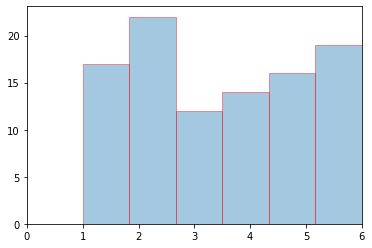

In [72]:
sns.distplot( one_100,bins = 6, kde = False, hist_kws={'edgecolor' : 'r'}, norm_hist=False)
#sns.countplot(one_100)
plt.xlim(0,6)

(0, 6)

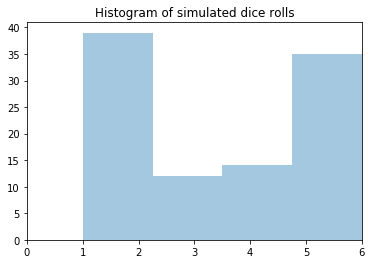

In [67]:

sns.distplot( one_100,kde = False)
plt.title("Histogram of simulated dice rolls")
plt.xlim(0,6)

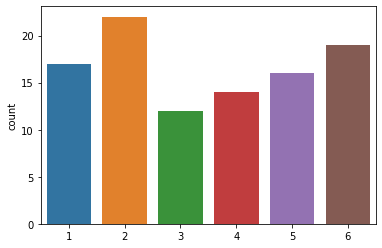

In [51]:
sns.countplot( one_100)



In [52]:
# creating population of random points
one_million = np.random.randint(1,7,1000000)

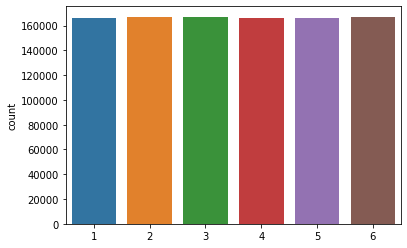

In [53]:
# Uniform distribution
sns.countplot( one_million)

In [77]:
# Calculating mean and standardard deviation
pop_mean= np.mean(one_million)
pop_mean

3.500407

In [78]:
pop_std = np.std(one_million)
pop_std

1.7072925450405387

In [58]:
# Taking 25 samples of sample size 4 and taking mean of it
one_100 

array([5, 2, 4, 5, 1, 6, 1, 5, 2, 4, 5, 6, 3, 1, 4, 3, 5, 3, 1, 3, 2, 3,
       4, 5, 5, 1, 4, 1, 1, 6, 4, 6, 2, 6, 3, 2, 2, 5, 1, 1, 6, 2, 1, 6,
       5, 5, 3, 6, 3, 6, 1, 4, 2, 2, 6, 2, 6, 6, 5, 6, 6, 2, 1, 2, 1, 6,
       2, 1, 3, 2, 3, 2, 2, 6, 1, 4, 6, 2, 5, 1, 4, 4, 4, 2, 4, 4, 2, 6,
       5, 4, 2, 3, 5, 3, 1, 5, 2, 6, 5, 2])

In [61]:
mean_100 = one_100.reshape(25,4).mean(axis = 1)

In [62]:
mean_100

array([4.  , 3.25, 4.25, 2.75, 3.  , 3.5 , 2.75, 4.25, 3.25, 2.25, 3.75,
       4.75, 3.5 , 3.  , 5.75, 2.75, 2.5 , 2.5 , 3.25, 3.5 , 3.5 , 4.  ,
       3.5 , 3.5 , 3.75])

In [63]:
mean_million = one_million.reshape(250000,4).mean(axis = 1)

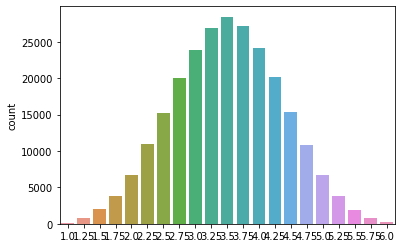

In [65]:
sns.countplot( mean_million)

In [75]:
sample_mean = np.mean(mean_million)
sample_mean

3.500407

In [76]:
# Standard deviation of SDSM
sample_std = np.std(mean_million)
sample_std

0.853056319565713

In [79]:
pop_mean

3.500407

In [80]:
pop_std

1.7072925450405387

In [83]:
sam_std = pop_std/np.sqrt(4)
sam_std

0.8536462725202694

In [ ]:
# As per CLT 
# Mean of sampple mean is populaiton mean
# Std of sample is std of populaiton /sqrt of sample size


In [85]:
# standard error 
std_err = pop_std/np.sqrt(4)
std_err

0.8536462725202694

In [86]:
# Increasing the sample size to 100
mean_million_100 = one_million.reshape(10000,100).mean(axis = 1)

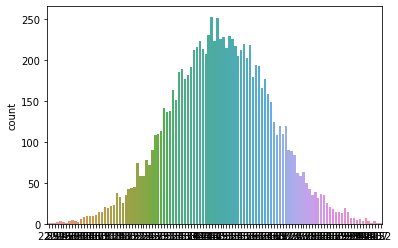

In [93]:
sns.countplot( mean_million_100)

In [88]:
sample_mean_100 = np.mean(mean_million)
sample_mean_100

3.500407

In [89]:
# Standard deviation of SDSM
sample_std_100 = np.std(mean_million)
sample_std_100

0.853056319565713

In [90]:
pop_mean

3.500407

In [91]:
pop_std

1.7072925450405387

In [92]:
sam_std_100 = pop_std/np.sqrt(100)
sam_std_100

0.17072925450405388

In [94]:
# Home Assignment
# Two machine with mean as 100, 70 and standard deviation as 4
m1 = np.random.normal(100,4,1000)
m2 = np.random.normal(80,4,1000)
dist = np.append(m1,m2)
np.random.shuffle(dist)



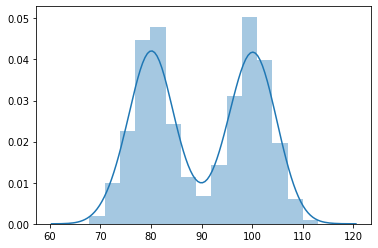

In [96]:
# We will get histogram with two different peaks
sns.distplot(dist)

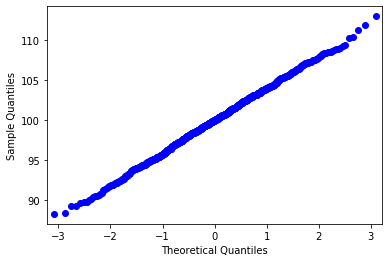

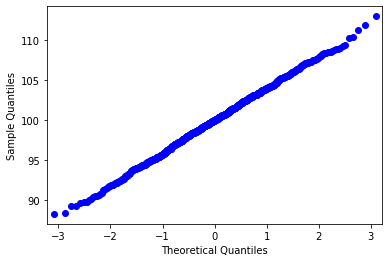

In [98]:

sm.qqplot(m1)

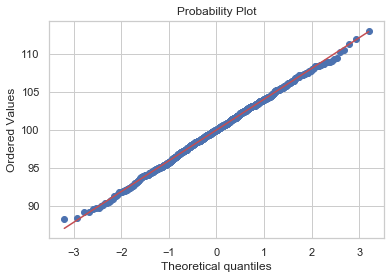

In [114]:
import scipy
sns.set(style="whitegrid")
scipy.stats.probplot(m1, plot=plt)
plt.show()

# Z test 

### Calculating Critical Values

In [1]:
# For Standard Normal Distribution
# mean = 0
# standard deviation = 1
# norm.cdf(x, loc = 0, scale = 1) cumlative distribution function. Area to the left of x
# norm.ppf(x, loc = 0, scale = 1) Percent point function ( inverse of cdf in percentiles)
# norm.sf(x, loc = 0, scale = 1) Survival Function. Also defined as (1 - cdf) Used to find greater than sth
# norm.isf( x, loc = 0 , scale = 1) percent point function - Inverse survival function  (inverse of sf)

In [5]:
norm.cdf(-1.06)

0.1445722996639096

In [4]:
# Area to the left of Z, -1.96 is calculated as
# One value for  critical
norm.cdf(-1.96)
# value is in percentage

0.024997895148220435

In [5]:
# to find out the z we give area equal to 0.025
# for the left side
norm.ppf(0.025)

-1.9599639845400545

In [6]:
# For the right side
# norm.sf gives the area to the right
norm.sf(1.96)
# Area in percentage

0.024997895148220435

In [8]:
# opposite of sf is isf
# Here we give the area 0.025 and will get the value of z
norm.isf(0.025)

1.9599639845400545

In [9]:
# Perfume example
# Machine producing perfume bottles with 150cc volumn
# Population Standard Deviation is 2cc
# We picked 100 piece of bottles from the produciton line & check the volumn of each bottle.
# We took the average that came out to be 150.2cc against the 150cc that machine was producing
# Has the mean volumn changed?
# We want to test this with 95% confidence
# alpha = 0.5% percent of error we are ready to accept
# That means 95% of all confidence interval that we find will contain the population parameter
# Zcal = (sample mean(x) - mean)/(std/sqrt(n))
zcal = (150.2 - 150)/(2/np.sqrt(100))
zcal

0.9999999999999432

In [10]:
# Zcritical for alpha = 0.025 two tail test is
# -1.96 & +1.96
# as my zcal is 1 and lies between +- 1.96 that means mean of the population is not changed.

In [11]:
# Perfume example
# Machine producing perfume bottles with 150cc volumn
# Population Standard Deviation is 2cc
# We picked 100 piece of bottles from the produciton line & check the volumn of each bottle.
# We took the average that came out to be 150.2cc against the 150cc that machine was producing
# ###Has the mean volumn increased?
# We want to test this with 95% confidence
# Its a one tail test
# alpha = 0.5% percent of error we are ready to accept
# That means 95% of all confidence interval that we find will contain the population parameter
# Zcal = (sample mean(x) - mean)/(std/sqrt(n))
zcal = (150.2 - 150)/(2/np.sqrt(100))
zcal

0.9999999999999432

In [14]:
# Zcritical for alpha = 0.05 one tail test is
# +1.645

zcritical = norm.isf(0.05)
zcritical

1.6448536269514729

In [1]:
# A machine is filling water bottles, and the amount of water in the bottles has a standard deviation of σ = 1 ounce. 
# We take a sample of 100 bottles and find that the bottles are filled with an average of 16 ounces of water. 
# What is the confidence interval for a confidence level of 90 % ?
n = 100
mean_sample = 16
conf_l = 0.9

In [3]:
# Which means the confidence interval will leave out 5 % of the area under the distribution in the left tail,
# and 5 % of the area under the distribution in the right tail.
# If we look up z-scores that correspond to 5 % on the lower end, and 95 % on the upper end, we get z = ± 1.65
confidence_interval_minus = 16 - 1.65*1/np.sqrt(100)
confidence_interval_plus = 16 + 1.65*1/np.sqrt(100)

In [5]:
confidence_interval_minus

15.835

In [6]:
confidence_interval_plus

16.165

In [7]:
# We’re 90 % certain that the actual population mean of the amount of water in the bottles is between 15.835 and 16.165 ounces

In [9]:
# To calculate t value lesser than 0.5%
# 9 is the degrees of freedom
t.ppf((1-.99)/2,9)

-3.2498355440153697

In [10]:
# To calculate t value greater than 99.5%
# 9 is the degrees of freedom
t.isf((1-.99)/2,9)

3.2498355440153697

In [2]:
np.sqrt(50)

7.0710678118654755

In [4]:
66 + 1.96*4/7.07

67.10891089108911

In [5]:
66 - 1.96*4/7.07

64.89108910891089

In [61]:
# 2.5 = 2.58*3.5/np.sqrt(n)

In [9]:
n = 2.58*3.5/2.5

In [14]:
n

3.6120000000000005

In [15]:
n*n

13.046544000000004

We want to know the mean number of day light hours in a day in our city over the course of 1 year. 
We take a random sample of 30 days throughout the year & get a sample mean of 13.15 hours & sample standard deviation of 0.85 hours. What is the confidence interval for a confidence level of 90%?

In [16]:
# To calculate t value lesser than 5% & greater than 95%
# 30 - 1 is the degrees of freedom
t.ppf((1-.90)/2,29)

-1.699127026533498

In [20]:
13.15 -(1.699*0.85/np.sqrt(30))

12.886335489526305

In [21]:
13.15 +(1.699*0.85/np.sqrt(30))

13.413664510473696

In [23]:
# Area to the left of Z = -1.46 is
norm.cdf(-1.46)

0.07214503696589378

# One Sample Z Test

In [24]:
# Perfume bottles producing 100cc with standard deviation of 2cc. 
# 100 bottles were randomly picked & average volume was found to be 150.2cc
# Has the mean value increased ?
# confidence interval is 95%


In [ ]:
# One tail test
#Null Hypothesis H0 = population mean is less than or equal to 150cc
# Alternate Hyposis Ha = Population mean is greater than 150cc

In [25]:
#Z = (sample mean - population mean)/(population std/sqrt(n))
z = (150.2 - 150)/(2/np.sqrt(100))

In [26]:
z

0.9999999999999432

In [29]:
z_critical = norm.isf(1-.95)

In [31]:
z_critical

1.6448536269514722

In [ ]:
# As our z is less than z critical.
# Fail to reject the null hypothesis

# Hypothesis Testing
#### H0 - Null Hypothesis 
- Nothing is happening or nothing new is happening or status quo. Nulls will have equal to, less than or equal to or greater than & equal to signs
#### Ha - Alternate Hypothesis 
- Something that is new or some thing that you want to prove

In [1]:
# Perfume example
# Machine producing perfume bottles with 150cc volumn
# Population Standard Deviation is 2cc
# We picked 4 piece of bottles from the produciton line & check the volumn of each bottle.
# We took the average that came out to be 153.8cc against the 150cc that machine was producing
# Has the mean volumn changed?
# We want to test this with 95% confidence
# alpha = 0.5% percent of error we are ready to accept

In [2]:
# Ha not equal to 150cc
# H0 - Equal to 150cc
# Alpha = 1 - .95 = 0.05
# Two tail test
# Z calculated = (observed mean - population mean)/Standard Error 
# Z calculated = (x - µ)/(σ / √n)

In [5]:
z_cal = (153.8 - 150)/(2/np.sqrt(4))
z_cal

3.8000000000000114

In [6]:
# from scipy.stats import norm
# For Standard Normal Distribution
# mean = 0
# standard deviation = 1
# Finding out the Z Critical using functions - 
# norm.cdf(x, loc = 0, scale = 1) cumlative distribution function. Area to the left of x
# norm.ppf(x, loc = 0, scale = 1) Percent point function ( inverse of cdf in percentiles)
# norm.sf(x, loc = 0, scale = 1) Survival Function. Also defined as (1 - cdf) Used to find greater than sth
# norm.isf( x, loc = 0 , scale = 1) percent point function - Inverse survival function  (inverse of sf)

In [7]:
# Area to the left of mean
norm.cdf(0)

0.5

In [8]:
# Area to the right of mean
norm.sf(0)

0.5

In [9]:
# Area to the left of -1.96 is
norm.cdf(-1.96)
# 2.5% area to the left 

0.024997895148220435

In [12]:
# Opposite of cdf function is ppf in which I will give area percentage
norm.ppf(0.025)
#1.96

-1.9599639845400545

In [13]:
# Opposite of sf function is isf in which I will give area percentage
norm.isf(0.025)
#1.96

1.9599639845400545

In [14]:
# Two critical vlaues are (-1.96, 1.96)
# Z_cal the calcualted value was 3.8 that is very far from the critical value so we 
# reject the null hypothesis. Hence we conclude that volumn is no more 150 cc

In [16]:
# P value is the area right of z_cal and multiplied by 2 (for two tailed test)
# Area to the right of 3.8 is norm.sf(3.8)
p_val = 2*norm.sf(3.8)
p_val

0.00014469608785023995

In [17]:
# as p value is very very less than alpha so we reject the null hypothesis
# When p is low null must go

In [18]:
norm.sf(1.46)

0.07214503696589378

In [19]:
norm.cdf(-1.23)

0.10934855242569191

In [20]:
norm.sf(1.23)

0.10934855242569191

In [21]:
# Example 2
# We want to find out whether the mean of the population has increased?

In [23]:
# n = 100
# Mean = 150
# Sigma = 2cc
# Sample mean = 150.2
# H0: mean = 150cc
# Ha: mean > 150cc 
# Confidence Level = 95%
# alpha = 1 - 0.95 = 0.05

In [24]:
Z_cal = (150.2 - 150)/(2/np.sqrt(100))
Z_cal

0.9999999999999432

In [25]:
Z_critical = norm.isf(0.05)
Z_critical

1.6448536269514729

In [26]:
# As Zcal < Z critical we fail to reject the null hypothesis
# Mean is not changed 

In [28]:
data = pd.read_csv('datasets\Machine1.csv')

In [29]:
data.head()

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58


In [30]:
data.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


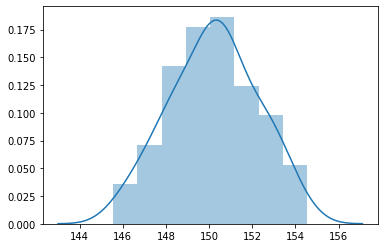

In [31]:
sns.distplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002990932B4C8>]],
      dtype=object)

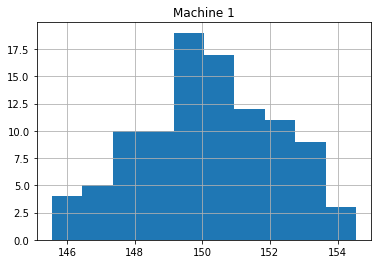

In [33]:
data.hist()

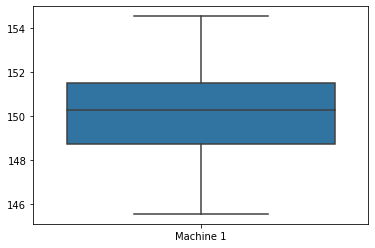

In [42]:
sns.boxplot(data = data)

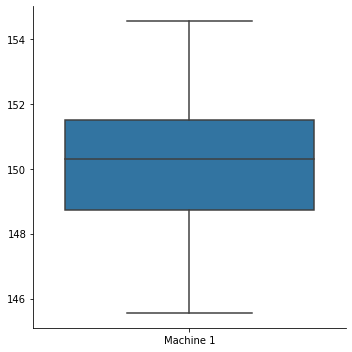

In [43]:
sns.catplot(data = data, kind = 'box')

In [45]:
from statsmodels.stats import weightstats

In [47]:
mydata = data['Machine 1']

In [50]:
# To find out whetehr the vol has changed
# alpha is 0.05
# x - sample data
# value - hypothesised mean
# two sided test - default
# 
weightstats.ztest(x1 =mydata, value = 150, alternative='two-sided' )
# 1st value is the calculated statistics
# 2nd value is the p value
# p value is much higher than the alpha value
# As p value is greater than alpha we can't reject the null hypothesis

(1.0060370247722599, 0.3143977600779597)

In [51]:
# Has the mean increased 
# 
# alpha is 0.05
# x - sample data
# value - hypothesised mean
# two sided test - default
# 
weightstats.ztest(x1 =mydata, value = 150, alternative='larger' )
# 1st value is the calculated statistics
# 2nd value is the p value
# p value is much higher than the alpha value
# As p value is greater than alpha we can't reject the null hypothesis

(1.0060370247722599, 0.15719888003897986)

# t - test

In [52]:
# Perfume bottle producing 150cc , 4 bottles are randomly picked & average was found to be 151cc & 
# standard deviation of the sample was 2cc. Has the mean changed ?
# alpha = 0.05 mean I should have 5% area in the rejection zomef
# Two tailed test
# Degree of freedom = 4-1 = 3
t_cal = (151 - 150)/(2/np.sqrt(4))
t_cal 


1.0

In [58]:
# Critical Value
t.ppf(0.025,3)

-3.1824463052842638

In [59]:
# Critical Value
t.isf(0.025,3)

3.1824463052842638

In [53]:
vol = pd.Series([148.5, 153.4, 150.9, 151.2])

In [55]:
vol.describe()

count      4.000000
mean     151.000000
std        2.004994
min      148.500000
25%      150.300000
50%      151.050000
75%      151.750000
max      153.400000
dtype: float64

In [57]:
stats.ttest_1samp(vol, 150)

Ttest_1sampResult(statistic=0.997509336107632, pvalue=0.3920333832606524)